<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_00_ProjZero_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Modules

In [207]:
# libs
import sys
import numpy as np
# sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
# vis
import matplotlib.pyplot as plt

## Settings

In [208]:
np.set_printoptions(suppress=True)

## Check version

In [209]:
print(sys.version)
print(np.__version__)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
1.26.4


## Proj One

### Dataset

In [210]:
np.random.seed(0)
sigma = 0.35
n = 50
degrees = 20
noise = sigma * np.random.randn(n).reshape(-1,1)

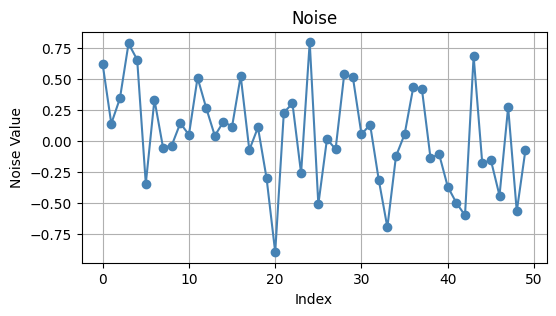

In [211]:
plt.figure(figsize=(6, 3))
plt.plot(noise, marker='o', linestyle='-', color='steelblue')
plt.title('Noise')
plt.xlabel('Index')
plt.ylabel('Noise Value')
plt.grid(True)
plt.show()

In [212]:
x_train = np.sort(np.random.rand(n)).reshape(-1,1)
y_train = np.sin(2.5 * np.pi * x_train) + noise
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (50, 1) y_train shape: (50, 1)


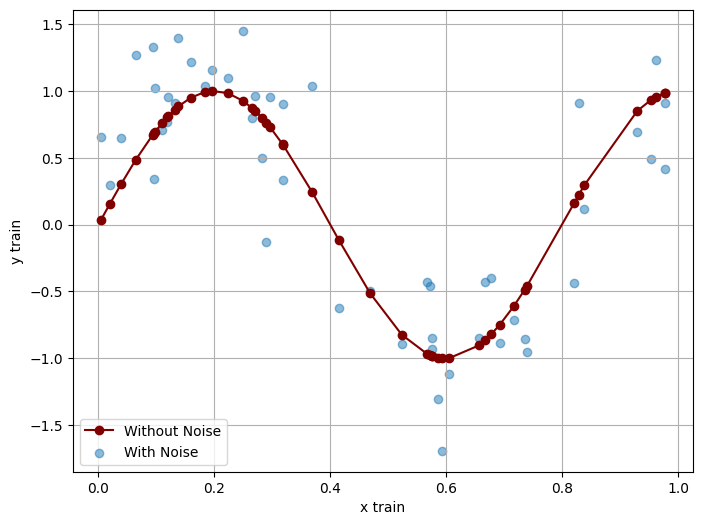

In [213]:
plt.figure(figsize=(8, 6))
plt.plot(x_train, np.sin(2.5 * np.pi * x_train), 'o-', label='Without Noise', color='maroon')
plt.scatter(x_train, y_train, label='With Noise', alpha=0.5)
plt.xlabel('x train')
plt.ylabel('y train')
plt.legend()
plt.grid(True)
plt.show()

In [214]:
x_test = np.sort(np.random.rand(n)).reshape(-1,1)
y_test = np.sin(2.5 * np.pi * x_test) + noise
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_test shape: (50, 1) y_test shape: (50, 1)


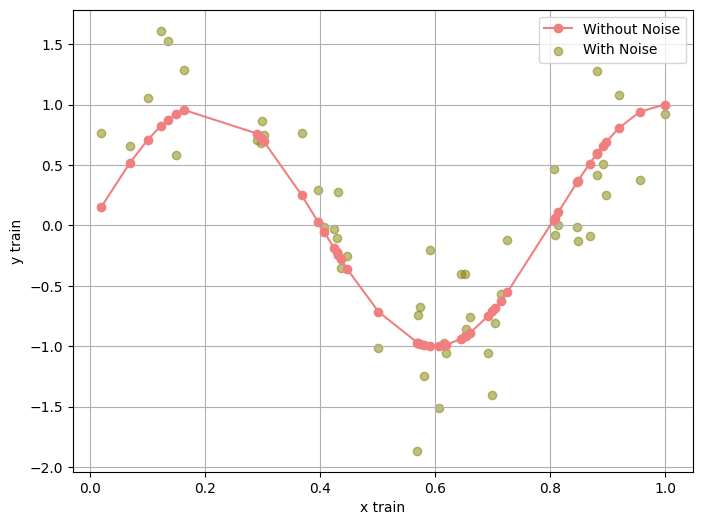

In [215]:
plt.figure(figsize=(8, 6))
plt.plot(x_test, np.sin(2.5 * np.pi * x_test), 'o-', label='Without Noise', color='lightcoral')
plt.scatter(x_test, y_test, label='With Noise', alpha=0.5, color='olive')
plt.xlabel('x train')
plt.ylabel('y train')
plt.legend()
plt.grid(True)
plt.show()

In [216]:
obj = preprocessing.PolynomialFeatures(degree=degrees, include_bias=False)
xp_train = obj.fit_transform(x_train)
xp_test = obj.fit_transform(x_test)
print("x_poly_train shape:", xp_train.shape)
print("x_poly_test shape:", xp_test.shape)

x_poly_train shape: (50, 20)
x_poly_test shape: (50, 20)


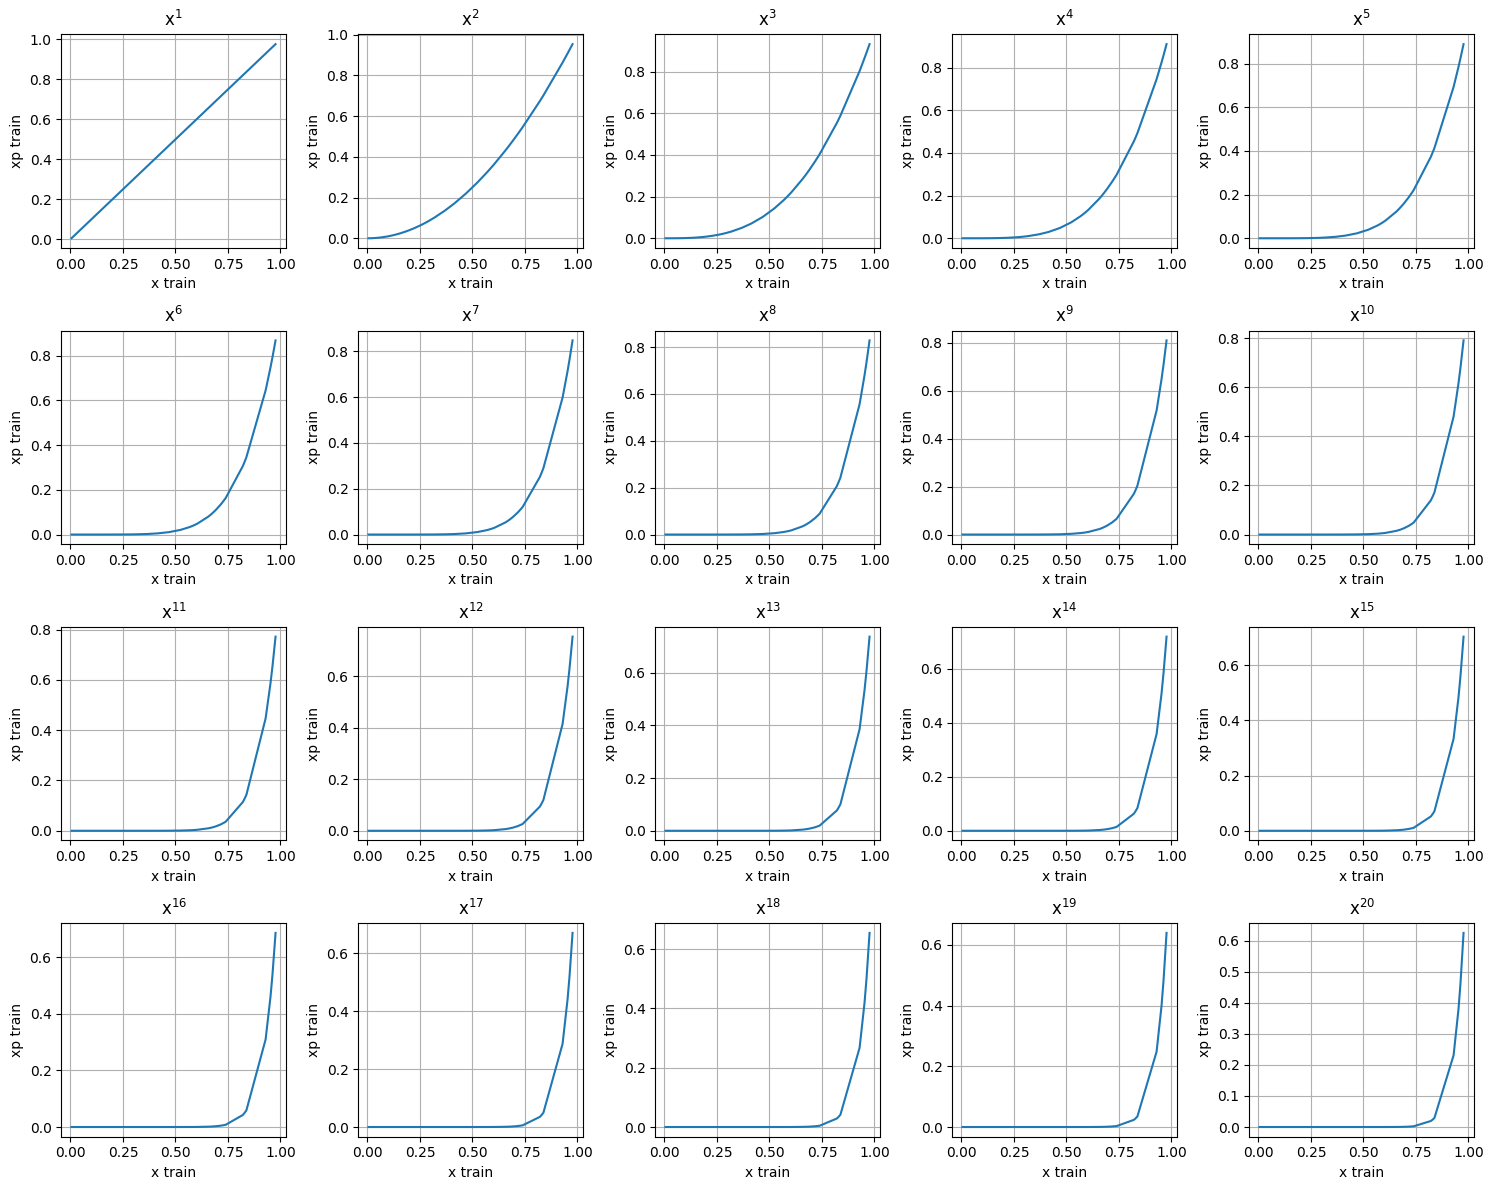

In [217]:
plt.figure(figsize=(15, 12))
for i in range(xp_train.shape[1]):
    plt.subplot(4, 5, i + 1)
    plt.plot(x_train, xp_train[:, i])
    plt.title(f'$\\mathrm{{x^{{{i+1}}}}}$')
    plt.xlabel('x train')
    plt.ylabel('xp train')
    plt.grid(True)
plt.tight_layout()
plt.show()

### Models

#### LinearRegression

In [218]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)
print("Linear MSE (train):", metrics.mean_squared_error(y_train, pred_train))
print("Linear MSE (test):", metrics.mean_squared_error(y_test, pred_test))

Linear MSE (train): 0.5754702900298801
Linear MSE (test): 0.6216994420398784


In [219]:
reg = linear_model.LinearRegression()  # polynomial features
reg.fit(xp_train, y_train)
pred_train = reg.predict(xp_train)
yp_test = reg.predict(xp_test)
print("Linear MSE (train):", metrics.mean_squared_error(y_train, pred_train))
print("Linear MSE (test):", metrics.mean_squared_error(yp_test, pred_test))

Linear MSE (train): 0.09098588649353669
Linear MSE (test): 113.32990992551554


#### Ridge

Text(0, 0.5, 'mse')

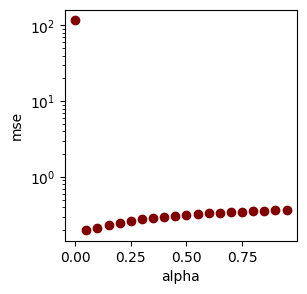

In [220]:
alphas = np.arange(0, 1, 0.05)
rig_mse = []
for alpha in alphas:
    rig = linear_model.Ridge(alpha=alpha, solver='svd')
    rig.fit(xp_train, y_train)
    pred = rig.predict(xp_test)
    rig_mse.append((alpha, metrics.mean_squared_error(y_test, pred)))
plt.figure(figsize=(3,3))
for alpha, mse in rig_mse:
    plt.scatter(alpha, mse, c='maroon')
plt.yscale('log')
plt.xlabel("alpha")
plt.ylabel("mse")

In [221]:
alpha = min(rig_mse, key=lambda x: x[1])[0]
rig = linear_model.Ridge(alpha=alpha, solver='svd')
rig.fit(xp_train, y_train)

Ridge(alpha=0.05, solver='svd')

In [222]:
pred_train = rig.predict(xp_train)
yp_test_rig = rig.predict(xp_test)
print(f'Ridge MSE [alpha = {alpha}] (train):', metrics.mean_squared_error(y_train, pred_train))
print(f'Ridge MSE [alpha = {alpha}] (test):', metrics.mean_squared_error(y_test, yp_test_rig))

Ridge MSE [alpha = 0.05] (train): 0.19930185940661047
Ridge MSE [alpha = 0.05] (test): 0.19853388980485065


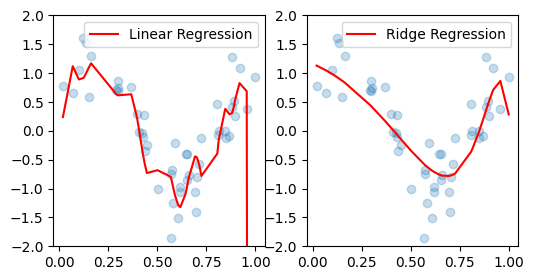

In [223]:
plt.figure(figsize=(6,3))
r, c = 1, 2
plt.subplot(r, c, 1)
plt.scatter(x_test, y_test, alpha=0.25)
plt.plot(x_test, yp_test, c='r', label='Linear Regression')
plt.ylim(-2,2)
plt.legend()
plt.subplot(r, c, 2)
plt.scatter(x_test, y_test, alpha=0.25)
plt.plot(x_test, yp_test_rig, c='r', label='Ridge Regression')
plt.ylim(-2,2)
plt.legend()

## Proj Two

### RidgeCV

In [224]:
dataset_diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (331, 10) y_train shape: (331,)
x_test shape: (111, 10) y_test shape: (111,)


In [225]:
alphas = np.arange(0, 0.5, 0.01)
rig_mse = []
for alpha in alphas:
    rig = linear_model.Ridge(alpha=alpha, solver='auto')
    rig.fit(x_train, y_train)
    pred_test = rig.predict(x_test)
    rig_mse.append((alpha, metrics.mean_squared_error(y_test, pred_test)))

Text(0, 0.5, 'mse')

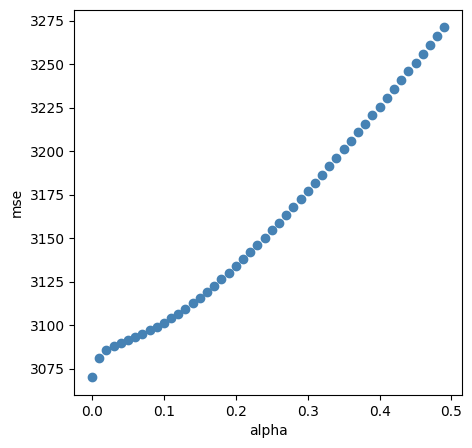

In [226]:
plt.figure(figsize=(5,5))
for alpha, mse in rig_mse:
    plt.scatter(alpha, mse, c='steelblue')
plt.xlabel("alpha")
plt.ylabel("mse")

In [227]:
alphas = np.logspace(-4, 4, 100)
rig_cv = linear_model.RidgeCV(alphas=alphas, cv=10)
rig_cv.fit(x_train, y_train)
pred_test = rig_cv.predict(x_test)
print("Ridge CV MSE (test):", metrics.mean_squared_error(y_test, pred_test))
print("alpha:", rig_cv.alpha_)

Ridge CV MSE (test): 3097.198814989346
alpha: 0.08111308307896872


### RidgeClassifierCV

In [228]:
dataset_cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(dataset_cancer.data, dataset_cancer.target)
print("x_train shape:", x_train.shape, "\nx_test shape:", x_test.shape)
print("y_train shape:", y_train.shape, "\ny_test shape:",  y_test.shape)

x_train shape: (426, 30) 
x_test shape: (143, 30)
y_train shape: (426,) 
y_test shape: (143,)


alpha: 0.0001
score:  0.958041958041958


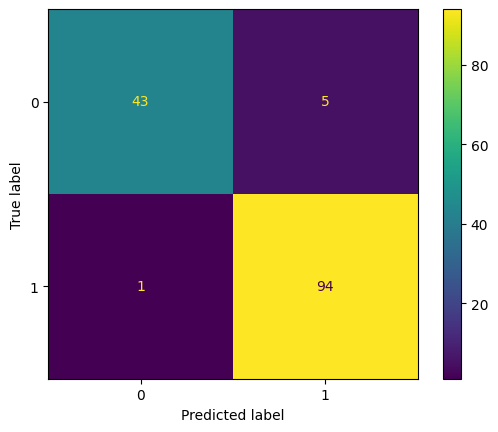

In [229]:
alphas = np.logspace(-4, 4, 100)
rig_clf = linear_model.RidgeClassifierCV(alphas=alphas, cv=10)
rig_clf.fit(x_train, y_train)
pred_test = rig_clf.predict(x_test)
print("alpha:", rig_clf.alpha_)
print("score: ", rig_clf.score(x_test, y_test))
conf_mat = metrics.confusion_matrix(y_test, pred_test, labels=rig_clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=rig_clf.classes_)
disp.plot()

### Lasso and LassoCV

In [230]:
dataset_housing = datasets.fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(dataset_housing["data"], dataset_housing["target"])
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (15480, 8) 
y_train shape: (15480,)
x_test shape: (5160, 8) 
y_test shape: (5160,)


In [231]:
alphas = np.logspace(-2, 1, 100)
lasso_mse = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    yp_test_lasso = lasso.predict(x_test)
    lasso_mse.append((alpha, metrics.mean_squared_error(y_test, yp_test_lasso)))

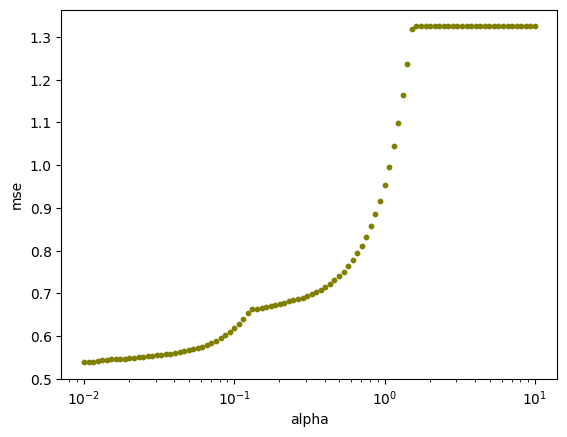

In [232]:
for alpha, mse in lasso_mse:
    plt.scatter(alpha, mse, c='olive', s=10)
plt.xlabel("alpha")
plt.ylabel("mse")
plt.xscale('log')

In [233]:
alpha = min(lasso_mse, key = lambda x: x[1])[0]
lasso = linear_model.Lasso(alpha=alpha)
lasso.fit(x_train, y_train)
pred_test = lasso.predict(x_test)
print("alpha:", lasso.alpha)
print("Lasso score:", lasso.score(x_test, y_test))

alpha: 0.01
Lasso score: 0.5934773018528143


In [234]:
lasso_cv = linear_model.LassoCV(cv=10)
lasso_cv.fit(x_train, y_train)
pred_test = lasso_cv.predict(x_test)
print("alpha:", lasso_cv.alpha_)
print("Lasso cv score:", lasso_cv.score(x_test, y_test))

alpha: 0.03563836432782236
Lasso cv score: 0.5791670732095158


### MultiTaskLassoCV and MultiTaskElasticNetCV

In [235]:
datasets_housing = datasets.fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(datasets_housing.data, datasets_housing.target)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)
y_train, y_test = np.concatenate([y_train, y_train**2, y_train**3], axis=1), np.concatenate([y_test, y_test**2, y_test**3], axis=1)

print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (15480, 8) 
y_train shape: (15480, 3)
x_test shape: (5160, 8) 
y_test shape: (5160, 3)


In [236]:
multi_lasso = linear_model.MultiTaskLassoCV(cv=10)
multi_lasso.fit(x_train, y_train)

print("alpha (Lasso):", multi_lasso.alpha_)
print("Coeff. (Lasso):", multi_lasso.coef_.round(2))
print("Multi task lasso cv score:", multi_lasso.score(x_test, y_test))

alpha (Lasso): 2.209893553614537
Coeff. (Lasso): [[ 0.41  0.02  0.    0.    0.   -0.   -0.    0.  ]
 [ 2.15  0.09  0.    0.    0.   -0.02 -0.02  0.  ]
 [ 9.98  0.45  0.    0.   -0.   -0.09 -0.05  0.  ]]
Multi task lasso cv score: 0.48625661810808585


In [237]:
multi_elastic = linear_model.MultiTaskElasticNetCV(cv=10)
multi_elastic.fit(x_train, y_train)

print("alpha (Elastic):", multi_elastic.alpha_)
print("Coeff. (Elastic):", multi_elastic.coef_.round(2))
print("Multi task elastic cv score:", multi_elastic.score(x_test, y_test))

alpha (Elastic): 4.419787107229074
Coeff. (Elastic): [[ 0.25  0.01  0.01  0.    0.   -0.   -0.02 -0.  ]
 [ 1.3   0.08  0.06  0.   -0.   -0.02 -0.08 -0.01]
 [ 6.05  0.38  0.33  0.   -0.   -0.08 -0.28 -0.05]]
Multi task elastic cv score: 0.4043600801088007


### Lars

In [238]:
dataset_diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes.data, dataset_diabetes.target)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (331, 10) y_train shape: (331,)
x_test shape: (111, 10) y_test shape: (111,)


In [239]:
lars = linear_model.Lars()
lars.fit(x_train, y_train)
y_pred = lars.predict(x_test)
coef_path = lars.coef_path_
path = np.sum(abs(coef_path), axis = 0)

print("Coeff.:", lars.coef_.round(2))
print("MSE:", metrics.mean_squared_error(y_test, y_pred).round(2))
print("(n_features, n_alphas + 1) :", coef_path.shape)

Coeff.: [  -76.85  -271.96   518.23   383.78 -4178.59  3193.91  1583.     577.55
  1991.9      0.39]
MSE: 2808.37
(n_features, n_alphas + 1) : (10, 13)


Text(0.5, 1.0, 'Lars')

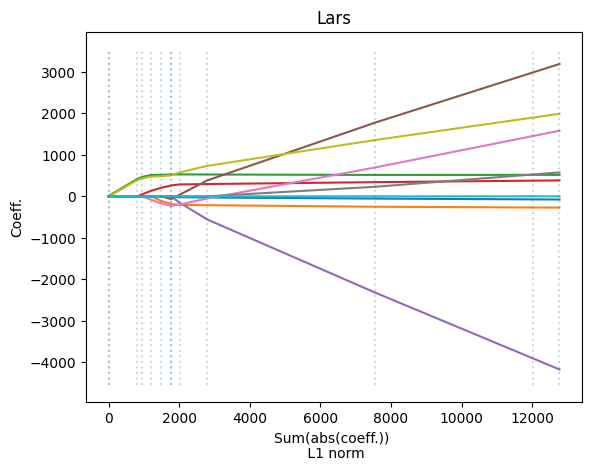

In [240]:
plt.figure()
plt.plot(path, coef_path.T)
ymin, ymax = plt.ylim()
plt.vlines(path, ymin, ymax, linestyle = "dotted", alpha = 0.25)
plt.xlabel("Sum(abs(coeff.)) \n L1 norm")
plt.ylabel("Coeff.")
plt.title("Lars")

In [241]:
target_l1_norm = 2000
step_index = np.argmin(np.abs(path - target_l1_norm))  # closest step
coeff = lars.coef_path_[:, step_index]
coeff

array([ -22.84045437, -206.65561136,  529.51588472,  287.89949222,
       -154.25507584,   39.49051391, -195.67923323,    0.        ,
        577.29064976,    0.        ])

### LinearRegression vs BayesianRidge vs ARDRegression

In [242]:
dataset_diabetes = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(dataset_diabetes["data"], dataset_diabetes["target"])

print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (331, 10) 
y_train shape: (331,)
x_test shape: (111, 10) 
y_test shape: (111,)


In [243]:
ols = linear_model.LinearRegression()
ols.fit(x_train, y_train)
pred_test_ols = ols.predict(x_test)

In [244]:
byr = linear_model.BayesianRidge()
byr.fit(x_train, y_train)
pred_test_byr = byr.predict(x_test)

In [245]:
ard = linear_model.ARDRegression()
ard.fit(x_train, y_train)
pred_test_ard = ard.predict(x_test)

In [246]:
print("MSE (Linear Regression):", metrics.mean_squared_error(y_test, pred_test_ols).round(1))
print("MSE (Bayesian Ridge):", metrics.mean_squared_error(y_test, pred_test_byr).round(1))
print("MSE (Automatic Relevance Determination):", metrics.mean_squared_error(y_test, pred_test_ard).round(1))

MSE (Linear Regression): 3738.6
MSE (Bayesian Ridge): 3655.4
MSE (Automatic Relevance Determination): 3630.5


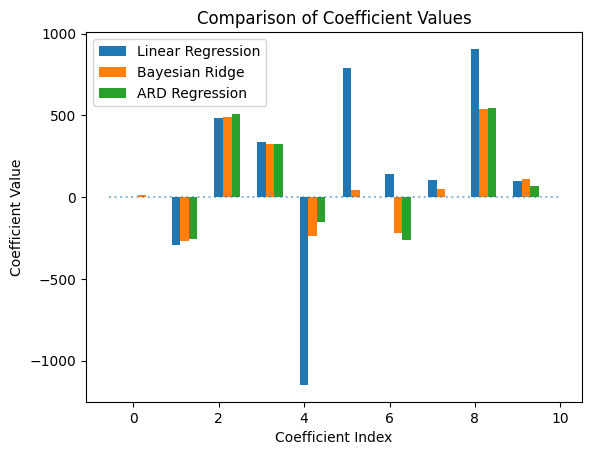

In [247]:
bar_width = 0.2
ols_coef = ols.coef_
byr_coef = byr.coef_
ard_coef = ard.coef_

x_pos = np.arange(len(ols_coef))

plt.bar(x_pos, ols_coef, width=bar_width, label='Linear Regression')
plt.bar(x_pos + bar_width, byr_coef, width=bar_width, label='Bayesian Ridge')
plt.bar(x_pos + 2 * bar_width, ard_coef, width=bar_width, label='ARD Regression')

xmin, xmax = plt.xlim()
plt.hlines(0, xmin, xmax, linestyles="dotted", alpha=0.5)

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficient Values")
plt.legend()
plt.show()

### LogisticRegression vs RidgeClassifier

In [248]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=0)
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (105, 4) 
y_train shape: (105,)
x_test shape: (45, 4) 
y_test shape: (45,)


In [249]:
logit = linear_model.LogisticRegression(penalty='l2',
                                        fit_intercept=True,
                                        random_state=None,
                                        solver='lbfgs',
                                        multi_class='ovr')
logit.fit(x_train, y_train)
pred_test_logit = logit.predict(x_test)
print(logit.score(x_test, y_test))

0.9555555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [250]:
ridge_clf = linear_model.RidgeClassifier()
ridge_clf.fit(x_train, y_train)
pred_test_ridge_clf = ridge_clf.predict(x_test)
print(ridge_clf.score(x_test, y_test))

0.7555555555555555


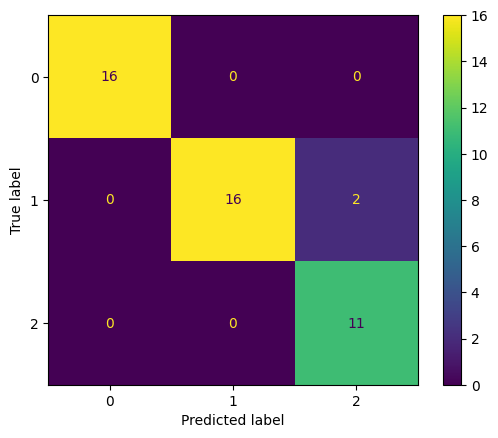

In [251]:
conf = metrics.confusion_matrix(y_test, pred_test_logit)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf,
                                      display_labels=logit.classes_)
disp.plot()

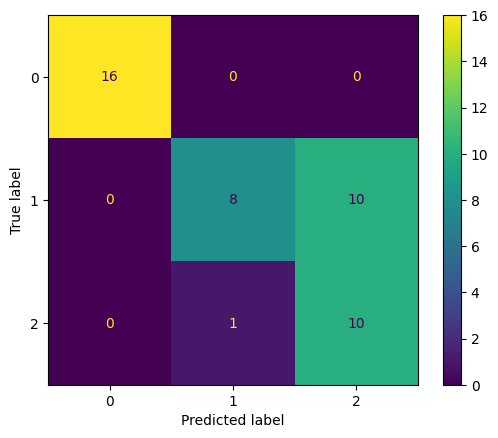

In [252]:
conf = metrics.confusion_matrix(y_test, pred_test_ridge_clf)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf,
                                      display_labels=ridge_clf.classes_)
disp.plot()

## SGDClassifier

In [253]:
dataset = datasets.load_iris()
print(dataset.keys())
print(dataset.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [254]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target)

In [255]:
max_iter = np.ceil(10**6/x_train.shape[0])
sgd = make_pipeline(preprocessing.StandardScaler(),
                    linear_model.SGDClassifier(max_iter=int(max_iter), tol=1e-3)
                    )
sgd.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=8929))])

In [256]:
pred_test = sgd.predict(x_test)
print("SGD classifier's score:", metrics.accuracy_score(y_test, pred_test))

SGD classifier's score: 0.868421052631579


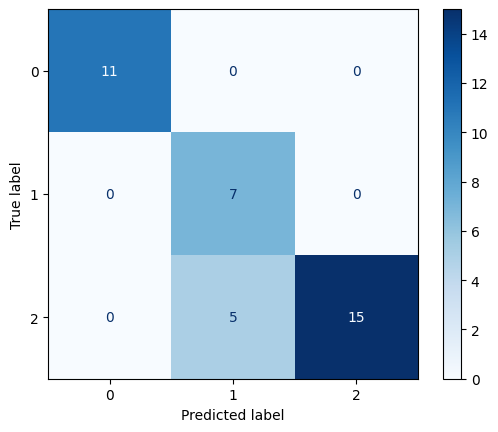

In [257]:
conf = metrics.confusion_matrix(y_test,
                                pred_test,
                                labels=sgd.classes_,
                                sample_weight=None,
                                normalize=None)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf,
                                      display_labels=sgd.classes_)
disp.plot(cmap=plt.cm.Blues)

## PassiveAggressiveClassifier

In [258]:
dataset = datasets.make_classification(n_samples=100, n_features=6, n_classes=2)
x_train, x_test, y_train, y_test = train_test_split(dataset[0], dataset[1])
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (75, 6) 
y_train shape: (75,)
x_test shape: (25, 6) 
y_test shape: (25,)


In [259]:
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],
    'max_iter': [1000, 2000, 5000],
    'tol': [1e-3, 1e-4, 1e-5]
    }

clf = linear_model.PassiveAggressiveClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='f1')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.5, 'max_iter': 1000, 'tol': 0.0001}
Best score: 0.9746031746031747


In [260]:
clf = grid_search.best_estimator_
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## RANSACRegressor

In [261]:
n_outliers = 50

x, y = datasets.make_regression(n_samples=500,
                                n_features=1,
                                noise=20,
                                random_state=0)

x[:n_outliers] = 3 + 0.05 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 50 * np.random.normal(size=n_outliers)

x_inliers, y_inliers = x[n_outliers:], y[n_outliers:]
x_outliers, y_outliers = x[:n_outliers], y[:n_outliers]

x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

In [262]:
reg = linear_model.RANSACRegressor(random_state=0)
reg.fit(x, y)
y_pred = reg.predict(x_test)

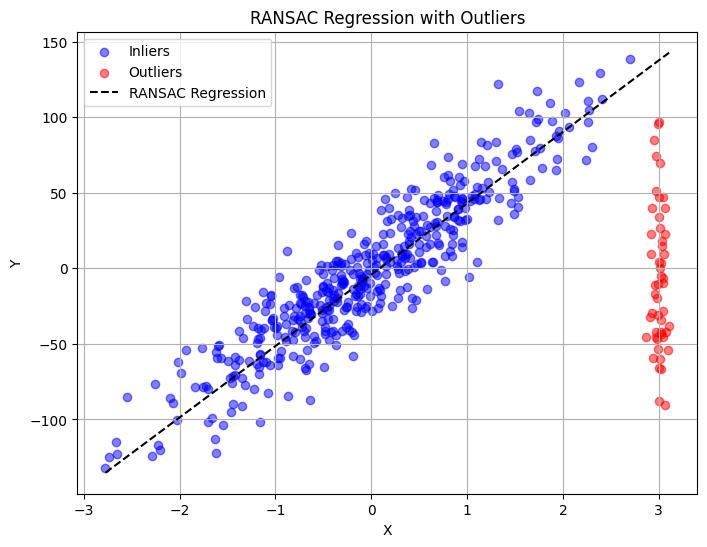

In [263]:
plt.figure(figsize=(8, 6))
plt.scatter(x_inliers, y_inliers, color='blue', alpha=0.5, label='Inliers')
plt.scatter(x_outliers, y_outliers, color='red', alpha=0.5, label='Outliers')
plt.plot(x_test, y_pred, color='black', linestyle='--', label='RANSAC Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RANSAC Regression with Outliers')
plt.legend()
plt.grid(True)
plt.show()